In [2]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
import pandas_profiling
from scipy import stats
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
#data = pd.read_csv(r"C:\Users\Nick Rendell\Desktop\20190918-49181-dump.csv")
data = pd.read_csv(r"C:\Users\charl\Dropbox\TheBusiness\Data Scientist\Braking\Data\20190918-49181-dump.csv")

C:\Users\charl\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [130]:
import math

In [37]:
from yellowbrick.regressor import ResidualsPlot

Remove unnecesary columns

In [3]:
data.drop(['asset_name','asset_id'], axis=1, inplace = True)

Calculate new variables  - braking rate

 braking rate = Start speed minus end speed divided by duration divided by 9.8 multiplied by 100

In [4]:
data['braking_rate'] = (data['start_wheel_speed_mps'] - data['end_wheel_speed_mps']) / data['duration_ms'] / 9.8* 100
                        

Take dataset from original data

In [ ]:
filtered_data = cleaned.sample(n = 20000, replace=True, random_state=1)

In [204]:
single_asset = cleaned.sample(n = 20000, replace=True, random_state=1)

In [19]:
single_asset.describe()

,duration_ms,average_demand_pressure_bar,average_delivery_pressure_bar,start_wheel_speed_mps,end_wheel_speed_mps,start_gps_speed_mps,start_gps_speed_accuracy_mps,end_gps_speed_mps,end_gps_speed_accuracy_mps,start_latitude,...,bag_pressure_bar,uphill_angle_before_deg_0,uphill_angle_before_deg_1,uphill_angle_before_deg_2,uphill_angle_before_deg_3,uphill_angle_before_deg_4,mass_kg,load_percent_inc_bogie,here_maps_uphill_angle_deg,braking_rate
count,900.000000,900.000000,900.000000,900.000000,900.000000,899.000000,899.000000,899.000000,899.000000,633.000000,...,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,234.000000,900.000000
mean,2139.542222,1.814327,0.994604,11.399396,8.839847,11.920990,1.718309,9.927308,1.672024,51.665907,...,1.674578,-1.856444,-1.257256,-0.767722,-0.429067,-0.095089,9516.336043,39.651400,-0.622364,0.012356
std,1225.488885,0.477322,0.281025,4.778624,5.163446,4.764989,0.731745,4.967592,0.727242,0.474292,...,0.788883,2.524408,2.482632,2.390777,2.274770,2.248073,3655.800337,15.232501,1.270237,0.004618
min,1000.000000,0.648000,0.411000,4.444000,2.500000,1.840000,0.160000,1.150000,0.150000,50.382190,...,0.720000,-9.760000,-9.870000,-8.400000,-8.710000,-8.170000,5092.682927,21.219512,-5.838000,0.000946
25%,1270.000000,1.552000,0.800000,7.500000,4.722000,8.240000,1.195000,6.115000,1.160000,51.504370,...,0.960000,-3.530000,-2.795000,-2.192500,-1.587500,-1.110000,6204.878049,25.853659,-1.273634,0.009695
50%,1770.000000,1.788500,0.956000,10.556000,7.222000,10.950000,1.640000,8.440000,1.590000,51.539460,...,1.600000,-1.430000,-0.755000,-0.250000,-0.040000,0.155000,9170.731707,38.211382,-0.435378,0.012379
75%,2610.000000,2.098250,1.145000,14.167000,11.389000,14.880000,2.250000,12.710000,2.130000,51.657620,...,2.000000,0.112500,0.412500,0.672500,0.840000,1.022500,11024.390244,45.934959,0.205075,0.015222
max,11550.000000,4.108000,2.218000,26.389000,25.833000,26.690000,4.340000,26.070000,4.520000,53.707480,...,3.760000,6.740000,7.920000,8.100000,7.070000,7.590000,19180.487805,79.918699,2.908000,0.031168


Data overview

In [ ]:
filtered_data.profile_report(style={'full_width':True})

Remove missing values

In [5]:
data.dropna(subset=['average_delivery_pressure_bar','average_demand_pressure_bar', 'uphill_angle_before_deg_4','load_percent_inc_bogie','mass_kg'],inplace=True)

 Remove outliers (3sd)

In [6]:
cleaned = data[data.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

Remove asset name column

In [7]:
cleaned.describe()

,duration_ms,average_demand_pressure_bar,average_delivery_pressure_bar,start_wheel_speed_mps,end_wheel_speed_mps,start_gps_speed_mps,start_gps_speed_accuracy_mps,end_gps_speed_mps,end_gps_speed_accuracy_mps,start_latitude,...,bag_pressure_bar,uphill_angle_before_deg_0,uphill_angle_before_deg_1,uphill_angle_before_deg_2,uphill_angle_before_deg_3,uphill_angle_before_deg_4,mass_kg,load_percent_inc_bogie,here_maps_uphill_angle_deg,braking_rate
count,690656.000000,690656.000000,690656.000000,690656.000000,690656.000000,690656.000000,690656.000000,690656.000000,690656.000000,690656.000000,...,690656.000000,690656.000000,690656.000000,690656.000000,690656.000000,690656.000000,690656.000000,690656.000000,690656.000000,690656.000000
mean,2026.910236,1.728100,1.003819,12.865922,10.415923,13.791040,0.328646,11.817901,0.326203,52.640330,...,1.860152,-2.778388,-2.157649,-1.661977,-1.267427,-0.945053,10931.467625,45.406669,-0.316242,0.012509
std,989.839088,0.404507,0.303723,5.111293,5.313942,5.220258,0.183480,5.419136,0.180723,1.007655,...,1.256133,3.004394,2.903191,2.812929,2.737018,2.681952,5943.304680,24.690488,1.043390,0.005124
min,1000.000000,0.600000,0.089000,4.039000,0.000000,0.650000,0.060000,0.100000,0.070000,50.254640,...,0.000000,-10.000000,-10.000000,-10.000000,-9.850000,-9.340000,3000.000000,11.111111,-3.742800,0.000008
25%,1286.000000,1.582000,0.792000,8.685000,6.035000,9.580000,0.210000,7.300000,0.210000,51.926237,...,0.800000,-4.910000,-4.180000,-3.530000,-3.010000,-2.590000,5876.283186,24.484513,-0.915000,0.009189
50%,1720.000000,1.746000,0.947000,12.134000,9.444000,13.100000,0.270000,10.880000,0.270000,52.535230,...,1.360000,-2.730000,-1.990000,-1.470000,-1.110000,-0.830000,8634.666667,35.847345,-0.217667,0.012326
75%,2460.000000,1.963000,1.186000,16.389000,13.806000,17.440000,0.380000,15.350000,0.380000,53.321052,...,2.640000,-0.720000,-0.180000,0.200000,0.500000,0.740000,15352.173913,63.478261,0.284860,0.015455
max,5883.000000,3.014000,2.023000,28.039000,25.961000,29.190000,1.340000,27.700000,1.320000,55.955780,...,5.680000,6.600000,6.920000,7.140000,7.290000,7.420000,29130.000000,121.375000,3.040000,0.038495


In [8]:
cleaned['DeliveryPress_Angle'] = cleaned.average_delivery_pressure_bar * cleaned.uphill_angle_before_deg_4

cleaned['DeliveryPress_Load'] = cleaned.average_delivery_pressure_bar * cleaned.load_percent_inc_bogie

cleaned['DeliveryPress_HereAngle'] = cleaned.average_delivery_pressure_bar * cleaned.here_maps_uphill_angle_deg

cleaned['DeliveryPress_HereAngle_load'] = cleaned.average_delivery_pressure_bar * cleaned.here_maps_uphill_angle_deg * cleaned.load_percent_inc_bogie

cleaned['DeliveryPress_Angle_load'] = cleaned.average_delivery_pressure_bar * cleaned.uphill_angle_before_deg_4 * cleaned.load_percent_inc_bogie

C:\Users\Nick Rendell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Nick Rendell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Nick Rendell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [203]:
cleaned['Log_braking'] = np.log(cleaned.braking_rate)

C:\Users\Nick Rendell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [72]:
RegressionOne_x = cleaned[['average_delivery_pressure_bar','average_demand_pressure_bar','DeliveryPress_Angle', 'DeliveryPress_Load', 'uphill_angle_before_deg_4','DeliveryPress_Angle','DeliveryPress_Angle_load','mass_kg']]



In [122]:
RegressionOne_x = cleaned[['average_demand_pressure_bar','uphill_angle_before_deg_4','load_percent_inc_bogie']]



In [214]:
RegressionTwo_x = single_asset[['average_demand_pressure_bar','uphill_angle_before_deg_4','load_percent_inc_bogie']]



In [11]:
RegressionOne_y = cleaned['braking_rate']

In [213]:
RegressionTwo_y = single_asset['braking_rate']

In [124]:
x1train, x1test, y1train, y1test = train_test_split(RegressionOne_x,RegressionOne_y, test_size=0.25, random_state=42)

In [215]:
x2train, x2test, y2train, y2test = train_test_split(RegressionTwo_x,RegressionTwo_y, test_size=0.25, random_state=42)

In [170]:
x2train.describe()

,average_demand_pressure_bar,uphill_angle_before_deg_4,load_percent_inc_bogie
count,15000.000000,15000.000000,15000.000000
mean,1.727329,-0.925221,45.479409
std,0.408318,2.678555,24.666512
min,0.600000,-9.320000,11.111111
25%,1.582000,-2.560000,24.484513
50%,1.746000,-0.800000,35.932914
75%,1.965000,0.750000,63.967391
max,3.011000,7.400000,119.552885


In [131]:
sample_weights_low = [math.log(x) for x in x1train]

TypeError: must be real number, not str

In [149]:
sample_weights_low = [np.sqrt(x) for x in x1train.average_demand_pressure_bar]

In [216]:
sample_weights_lower = [1/x for x in x2train.average_demand_pressure_bar]

In [178]:
len(sample_weights_low)

20000

Train the model

In [151]:
lm1 = LinearRegression()
lm1.fit(x1train,y1train, sample_weight = sample_weights_low)
pred_train = lm1.predict(x1train)
y_outcomes = lm1.predict(x1test)

In [217]:
lm2 = LinearRegression()
lm2.fit(x2train,y2train, sample_weight = sample_weights_lower)
pred_train2 = lm2.predict(x2train)
y_outcomes2 = lm2.predict(x2test)

In [ ]:
RegressionOne_y.describe()

In [114]:
lm1.coef_

array([ 2.01768286e-03,  6.77194712e-03,  1.11831167e-04, -4.59678776e-07,
       -1.81107264e-04,  1.11831167e-04, -8.15386415e-07, -1.33839237e-07])

In [196]:
lm2.coef_

array([ 7.80335982e-03,  2.53528537e-06, -1.55832422e-05])

In [102]:
# The coefficients
print('Coefficients: \n', lm1.coef_)

Coefficients: 
 [ 3.38550524e-03  6.38053294e-03  5.59717191e-05 -8.16773775e-06
 -9.45406032e-05  5.59717191e-05 -1.90469666e-07 -1.32521911e-07]


In [152]:
# The mean squared error
print("Mean squared error: %.6f"% mean_squared_error(y1test, y_outcomes))

Mean squared error: 0.000016


In [220]:
# The mean squared error
print("Mean squared error: %.6f"% mean_squared_error(y2test, y_outcomes2))

Mean squared error: 0.000016


In [153]:
print('Variance score: %.5f' % r2_score(y1test, y_outcomes))

Variance score: 0.39479


In [218]:
print('Variance score: %.2f' % r2_score(y2test, y_outcomes2))

Variance score: 0.40


Text(0, 0.5, 'Residuals')

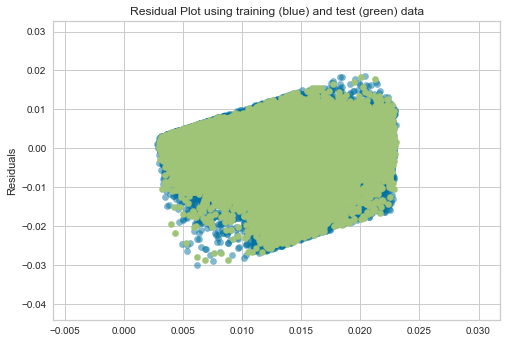

In [154]:
plt.scatter(lm1.predict(x1train), lm1.predict(x1train) - y1train, c='b', s=40, alpha=0.5)
plt.scatter(lm1.predict(x1test), lm1.predict(x1test) - y1test, c='g', s=40)
plt.hlines(y = 0, xmin = 0, xmax = 0)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')

Text(0, 0.5, 'Residuals')

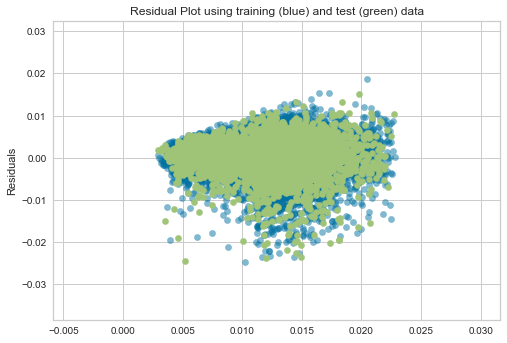

In [219]:
plt.scatter(lm2.predict(x2train), lm2.predict(x2train) - y2train, c='b', s=40, alpha=0.5)
plt.scatter(lm2.predict(x2test), lm2.predict(x2test) - y2test, c='g', s=40)
plt.hlines(y = 0, xmin = 0, xmax = 0)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')

In [10]:
cleaned.to_csv(r'C:\Users\charl\Dropbox\TheBusiness\Data Scientist\Braking\cleaned.csv')

In [ ]:
len(y_outcomes)

In [ ]:


# The coefficients
print('Coefficients: \n', lm1.coef_)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y1test, pred_test))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()